  <img src="header.PNG" align="center">


<h2> <span style="color:#0000C0">Introduction</span></h2>


<B>There is two types of Linear Regression 
1/ Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best.
The line can be modelled based on the linear equation shown below.</br>

<B>y = a_0 + a_1 * x     
2/ Multiple Linear Regression is Multiple =Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.
In Multiple Linear Regression, the target variable(Y) is a linear combination of multiple predictor variables x1, x2, x3, ...,xn. Since it is an enhancement of Simple Linear Regression, so the same is applied for the multiple linear regression equation, the equation becomes:</B>

<B> Y= b<sub>0</sub>+b<sub>1</sub>x<sub>1</sub>+ b<sub>2</sub>x<sub>2</sub>+ b<sub>3</sub>x<sub>3</sub>
where Y= Output/Response variable

<B>b0, b1, b2, b3 , bn....= Coefficients of the model.

<B>x1, x2, x3, x4,...= Various Independent/feature variable </B>

<h2> <span style="color:#0000C0">Example 1</span></h2>


<B>According to physics, there is a linear
relationship, h =gxS, where h is the height from which an object is falling, and S is the
squared time in seconds that the object needs to reach the ground.
In this example, there is only a single input variable, and so these kinds of models are
called univariate or simple</B>

<B>we exploit grav.csv to learn data and determinate the linear model </B>

In [1]:
#read grav.csv
import pandas as pd
import numpy as np
ines_rebhi = pd.read_csv('grav.csv')
ines_rebhi.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [2]:
#selection de la première colonne de notre dataset(height) 
X = ines_rebhi.iloc[0:len(ines_rebhi),0]
#selection de deuxième colonnes de notre dataset (seconds squared)
Y = ines_rebhi.iloc[0:len(ines_rebhi),1]


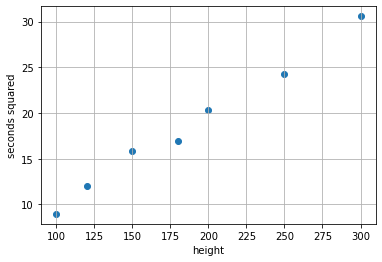

In [3]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.xlabel('height')
plt.ylabel('seconds squared')
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()


<B>Correlation between x and y </B>

In [4]:
np.corrcoef(X,Y)

array([[1.        , 0.99473243],
       [0.99473243, 1.        ]])

In [5]:
from scipy import stats
import statsmodels.api as sm
import matplotlib as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
#here we fit the data to the model
model = sm.OLS(Y,X).fit()




In [6]:
slope

0.10280912511759172

In [7]:
intercept

-0.6801232361241745

In [8]:
target = slope * X + intercept

In [9]:
1/0.10280912511759172


9.726763055868954

<B>refind the value of g</B> 

h = g * s

In [10]:
# testing the model 
pred = model.predict([125])
print(pred)

[12.44451803]


In [11]:
g= 125/12.44451803
print( g)

10.044583462265273


<h2> <span style="color:#0000C0">Example 2</span></h2>


<B>we are interested in a prediction of the final exam scores from future students,
based on their pretest scores. This can be done by applying the build regression model on
this new dataset of pretest results. We provides a dataset called “test_scores.sav” , which
comprises data for the kind of analysis described here</B>

In [12]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Exam = pd.read_csv('test_scores.csv')


X1_train = Exam.iloc[0:len(Exam),9]

Y_train = Exam.iloc[0:len(Exam),10]

from scipy import stats
import statsmodels.api as sm

slope, intercept, r_value, p_value, std_err = stats.linregress(X1_train ,Y_train)
#here we fit the data to the model
model = sm.OLS(Y_train,X1_train).fit()
stats.linregress(X1_train,Y_train)



LinregressResult(slope=0.9805882408420609, intercept=13.213064144516075, rvalue=0.9508842857175768, pvalue=0.0, stderr=0.006915017334664035)

In [13]:
posttest_prediction = model.predict([60])
print("posttest_prediction =",posttest_prediction)

posttest_prediction = [72.43324188]


<B>Now w try with 2 inputs pretest and nb_etudiants</B>

In [14]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Exam = pd.read_csv('test_scores.csv')

X_train = Exam[['pretest', 'n_student']]
y_train = Exam['posttest']


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


posttest_prediction = regr.predict([[60, 20]])

print("posttest_prediction =" , posttest_prediction )


posttest_prediction = [72.31555937]


<B> ==> The precision increase when we apply multiple linear regression </B>

<h2> <span style="color:#0000C0">Example 3</span></h2>


<B>Linear Regression with the Regression Node In this exercise, we build a regression model for the
Boston housing data, housing.data.txt , with the Regression node.</B>


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import r2_score


#1. Import the data  

boston = pd.read_csv('boston.csv')
#1.specify the variable types with the Type node.
print(boston.keys())

#2.select MEDV as the target variable

y_train=boston['MEDV']

#2.other variables as the input
x_train=boston.drop("MEDV", axis=1) 
#2.Linear regression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
#3.the most important variables are PTRATIO and LSTAT and TAX

print('Coefficients: \n', regr.coef_)
print("**************************************************************************")


X1_train = boston[['TAX','PTRATIO', 'LSTAT']]
y1_train = boston['MEDV']



X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train, y1_train, test_size=0.3, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)
y1_pred = regr.predict(X1_test)

prediction_medv = regr.predict([[296.000,15.300, 4.980]])

print("prediction_medv =" , prediction_medv)

print("**************************************************************************")

# the value of R2
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred))






Index(['CIRM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Coefficients: 
 [-8.24027425e-02  4.27997844e-02  2.97094266e-02  2.82763431e+00
 -1.66962412e+01  3.86228824e+00  7.18506471e-04 -1.39624794e+00
  2.65319677e-01 -1.21572849e-02 -9.44528916e-01  1.04228444e-02
 -5.48477033e-01]
**************************************************************************
prediction_medv = [32.63932041]
**************************************************************************
Coefficient of determination: 0.57


In [16]:
import sklearn
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
print(boston_data.feature_names)
print(boston_data.target)

print(boston_data.DESCR)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 

In [17]:
boston_pd = pd.DataFrame(boston_data.data)
boston_pd.columns = boston_data.feature_names

boston_pd['PRICE'] = boston_data.target

In [18]:
boston_pd.head()
boston_pd.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<B>correlation</B>

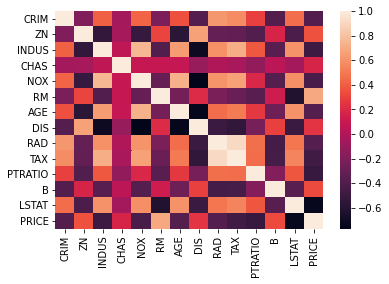

In [19]:
import seaborn as sns
%matplotlib inline

corr_coeffs = boston_pd.corr()
sns.heatmap(corr_coeffs, xticklabels=corr_coeffs.columns, yticklabels=corr_coeffs.columns);

<B>Train and Split</B>

In [20]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of test records: ' + str(X_test.shape[0]))

Number of training records: 354
Number of test records: 152


In [21]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<B>Standarization</B>

In [22]:
scaler = preprocessing.StandardScaler()


In [23]:
lr = LinearRegression()


In [24]:
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])


<B>Train model </B>


In [25]:
model = pipeline.fit(X_train, y_train)


In [26]:
y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print('MSE: ' + str(mse))

MSE: 30.697037704088583


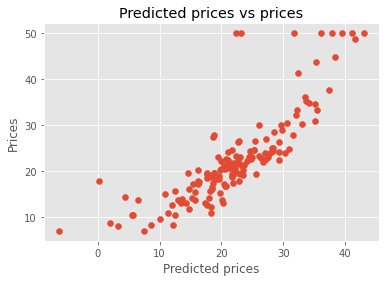

In [27]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('Predicted prices vs prices')
plt.ylabel('Prices')
plt.xlabel('Predicted prices')
plot = plt.scatter(y_pred, y_test)

<h2> <span style="color:#0000C0">Conclusion</span></h2>


<B>In this workshop , we had applied the linear regression(simple and multiple) </br>
The multiple linear regression is more powerful (score) than simple linear regression in most cases</B>

In [28]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [33]:
%load_ext watermark

In [34]:
%watermark?

Docstring:
::

  %watermark [-a AUTHOR] [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v] [-p PACKAGES] [-h] [-m] [-g] [-r]
                 [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time zone in the ISO 8601 standard with UTC
                        offset
  -z, --timezone        appends the local time zone
  -u, --updated         appends a string "Last updated: "
  -c CUSTOM_TIME, --custom_time CUSTOM_TIME
                        prints a valid strftime() string
  -v, --python          prints Python and IPython version
  -p PACKAGES, --packages PACKAGES
                        prints ve

In [35]:
%watermark -v -m -p  pandas,numpy,plt,sns,scipy,sm,sklearn

CPython 3.8.3
IPython 7.16.1

pandas 1.0.5
numpy 1.18.5
plt not installed
sns not installed
scipy 1.5.0
sm not installed
sklearn 0.23.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores  : 8
interpreter: 64bit
